In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize KNN classifier
knn_clf = KNeighborsClassifier(n_neighbors=5)

# Train model
knn_clf.fit(X_train, y_train)

# Predict
y_pred = knn_clf.predict(X_test)

# Evaluate
print("Classification Accuracy:", accuracy_score(y_test, y_pred))


Classification Accuracy: 1.0


In [ ]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Load dataset
column_names = ['Age', 'Cholesterol', 'Heart Rate', 'Diabetes',
                'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week', 'Stress Level'
                , 'Sedentary Hours Per Day', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day'
                , 'Heart Attack Risk']

data = pd.read_csv('/content/sample_data/heart_attack_prediction_dataset.csv',header=0)
# Split dataset
X = data[column_names[:-1]] # Features
y = data['Heart Attack Risk']   # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize KNN regressor
knn_reg = KNeighborsRegressor(n_neighbors=5)

# Train model
knn_reg.fit(X_train, y_train)

# Predict
y_pred = knn_reg.predict(X_test)

# Evaluate
print("Regression MSE:", mean_squared_error(y_test, y_pred))


Regression MSE: 0.27014073792316473


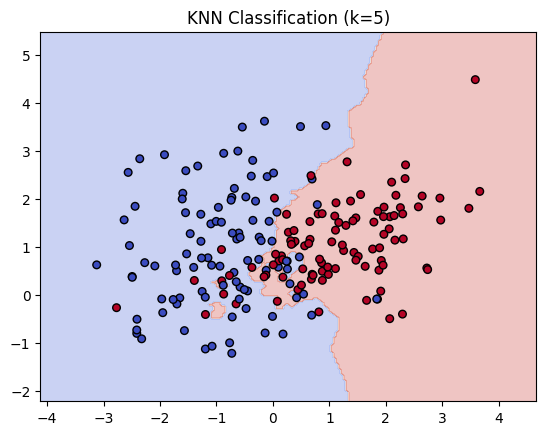

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier

# Create synthetic 2D dataset
X, y = make_classification(
    n_samples=200, n_features=2, n_informative=2, n_redundant=0,
    n_clusters_per_class=1, random_state=42
)

# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

# Create meshgrid for plotting
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Predict for each grid point
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors='k', cmap=plt.cm.coolwarm)
plt.title("KNN Classification (k=5)")
plt.show()


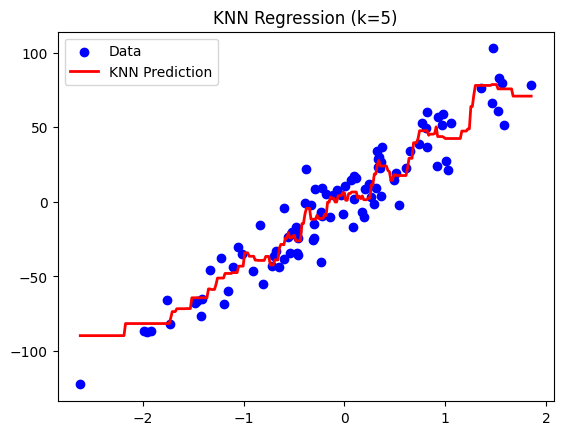

In [ ]:
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor

# Create synthetic 1D regression dataset
X, y = make_regression(n_samples=100, n_features=1, noise=15, random_state=42)

# Train KNN regressor
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X, y)

# Predict on smooth line
X_test = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
y_pred = knn_reg.predict(X_test)

# Plot
plt.scatter(X, y, color="blue", label="Data")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="KNN Prediction")
plt.title("KNN Regression (k=5)")
plt.legend()
plt.show()


In [ ]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.7 MB/s eta 0:00:00


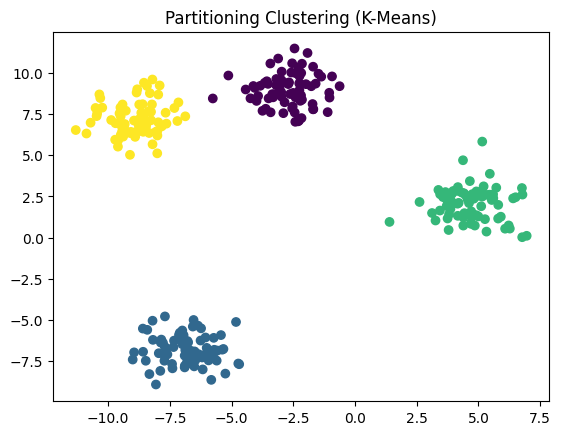

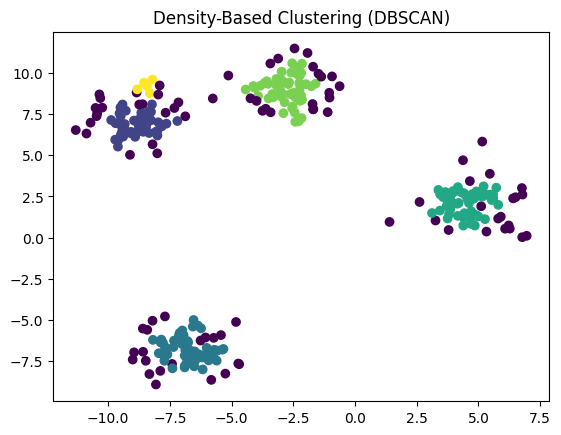

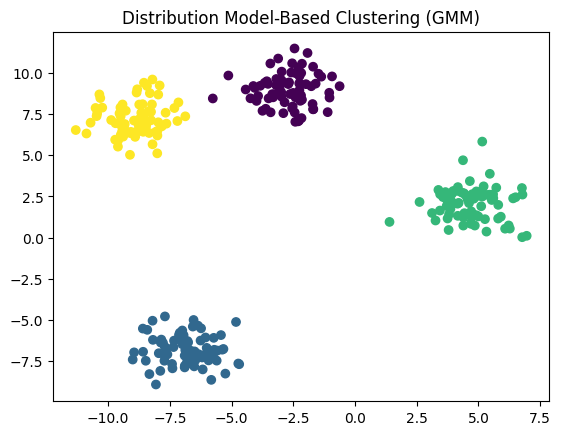

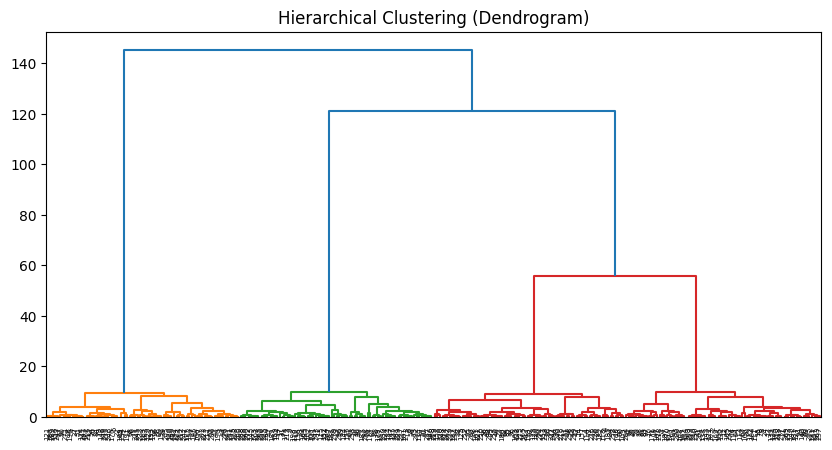

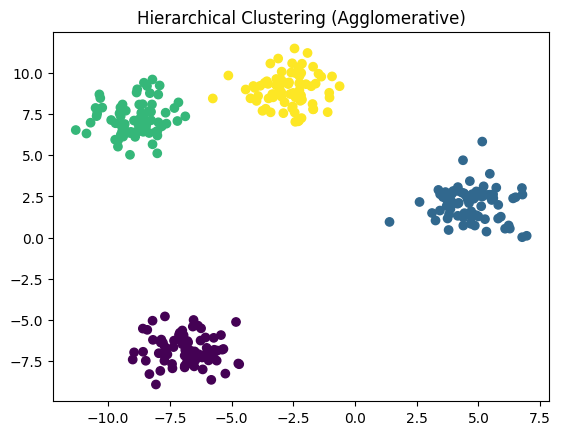

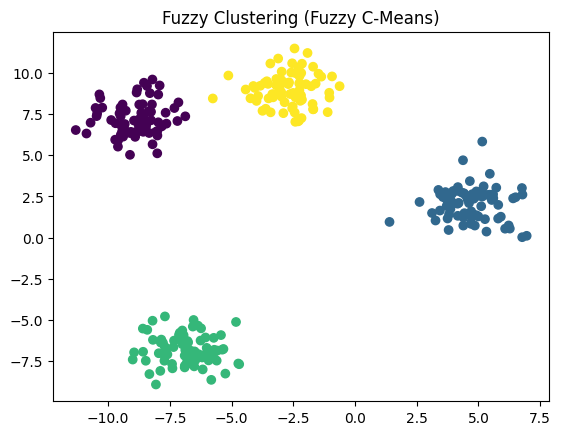

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import skfuzzy as fuzz

# Generate synthetic data
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

# Partitioning Clustering (K-Means)
def partitioning_clustering(X):
    kmeans = KMeans(n_clusters=4, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    plt.title('Partitioning Clustering (K-Means)')
    plt.show()

# Density-Based Clustering (DBSCAN)
def density_based_clustering(X):
    dbscan = DBSCAN(eps=0.5, min_samples=5)
    labels = dbscan.fit_predict(X)
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    plt.title('Density-Based Clustering (DBSCAN)')
    plt.show()

# Distribution Model-Based Clustering (Gaussian Mixture Model)
def distribution_model_based_clustering(X):
    gmm = GaussianMixture(n_components=4, random_state=42)
    gmm.fit(X)
    labels = gmm.predict(X)
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    plt.title('Distribution Model-Based Clustering (GMM)')
    plt.show()

# Hierarchical Clustering (Agglomerative)
def hierarchical_clustering(X):
    Z = linkage(X, method='ward')
    plt.figure(figsize=(10, 5))
    dendrogram(Z)
    plt.title('Hierarchical Clustering (Dendrogram)')
    plt.show()

    # Cut tree to form clusters
    labels = fcluster(Z, t=4, criterion='maxclust')
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    plt.title('Hierarchical Clustering (Agglomerative)')
    plt.show()

# Fuzzy Clustering (Fuzzy C-Means)
def fuzzy_clustering(X):
    # Transpose data for fuzzy C-means
    data = np.array(X).T

    # Fuzzy C-Means
    cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(data, c=4, m=2.0, error=0.005, maxiter=1000, init=None)

    # Assign labels
    labels = np.argmax(u, axis=0)
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    plt.title('Fuzzy Clustering (Fuzzy C-Means)')
    plt.show()

# Run each clustering algorithm
partitioning_clustering(X)
density_based_clustering(X)
distribution_model_based_clustering(X)
hierarchical_clustering(X)
fuzzy_clustering(X)
